## Import of Model

In [47]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
import torch
import csv
import os
import seaborn as sns
import numpy as np 
import time
import progressbar

import pandas as pd
tokenizer = AutoTokenizer.from_pretrained("l3cube-pune/hing-bert-lid")
model = AutoModelForTokenClassification.from_pretrained("l3cube-pune/hing-bert-lid")
sns.set_theme(style="whitegrid")

csvPath =  "Aggression_Imbalance_DS.csv"

### get_predicted_token_classes

In [2]:
def get_predicted_token_classes(intputToken):
    inputs = tokenizer(intputToken, add_special_tokens=False, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_token_class_ids = logits.argmax(-1)
    predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids[0]]
    return predicted_tokens_classes;

In [3]:
msg = "You're right - idiots like tushar kapoor, for that matter brats like sooraj pancholi have robbed chances off so many talented actors from even surfacing. What a shame."
#  "HuggingFace is a company based in Paris and New York"
msg = "congress mukt bharat k saath saath Tumlogo ka v safaya ho jayega.....haram khoro..... 3 Yrs me 5000 Hindu ka converstion hua islam me .....is par kya bologe.....chutiya.  Party of India CPI....."

predicted_tokens_classes = get_predicted_token_classes(msg);


In [4]:
df = pd.read_csv(csvPath)
#df = pd.read_csv("age_en_dev.csv" , header= None)

In [5]:
msgObj =  list(df.loc[0]);
print(msgObj[0])

what a wicket !!!!!!!!! woohooooo #indvsuae #wontgiveitback #cwc15 #bleedblue


In [6]:
dirPathForStorageData = '/home/studio-lab-user/threshold_data/'
ENG = 0 
HINDI = 1
CODEMIXED = 2
def differHindi(element):
    return element == "HI";

def differEnglish(element):
    return element == "EN";

def getClassCount(tokenList):
    eng_words = list(filter(differEnglish,tokenList));
    hi_words  = list(filter(differHindi,tokenList));  
    return { "Hindi" :  hi_words ,  "Eng" :  eng_words}

def returnClass(tokenList ,THRESHOLD):
    data    = getClassCount(tokenList);
    he_per  = len(data["Hindi"]) *1.0 /  len(tokenList);
    eng_per = len(data["Eng"])*1.0  /  len(tokenList);
    #print(he_per ,  eng_per)
    if (he_per < THRESHOLD  and 1 - THRESHOLD <=  eng_per ):
        return ENG;
    elif (eng_per < THRESHOLD  and 1 - THRESHOLD <=  he_per ):
        return HINDI;
    else:
        return CODEMIXED;

In [7]:
# !pip install progressbar

In [8]:
#pip install progressbar2

In [9]:

widgets = [' [',
		progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
		'] ',
		progressbar.Bar('*'),' (',
		progressbar.ETA(), ') ',
		]




In [10]:
def storeInCSV(data, filename):
     with open(filename, 'w', newline='' ) as file:
        writer = csv.writer(file, quoting=csv.QUOTE_ALL,delimiter=',')
        writer.writerows(data)
def calculateWithThreshold(df,THRESHOLD):
    bar = progressbar.ProgressBar(max_value=len(df),widgets=widgets).start()
    hindiData   = []
    engData = []
    mixedData = []
    for i in range(len(df)):
        msgObj =  list(df.loc[i]);
        if (len(msgObj[0]) > 511):
            continue;
        predicted_tokens_classes = get_predicted_token_classes(msgObj[0]);
        className = returnClass(predicted_tokens_classes ,THRESHOLD);
        if(ENG == className  ):
            engData.append(msgObj);
        elif (HINDI ==  className):
            hindiData.append(msgObj);
        else : 
            mixedData.append(msgObj)
        bar.update(i);       
    filename = os.path.join(dirPathForStorageData,str(THRESHOLD) + 'mixedData.csv')
    storeInCSV(mixedData , filename)
    filename = os.path.join(dirPathForStorageData,str(THRESHOLD) + 'engData.csv')
    storeInCSV(engData , filename)
    filename = os.path.join(dirPathForStorageData,str(THRESHOLD) + 'hindiData.csv')
    storeInCSV(hindiData , filename)
    print("THRESHOLD" , THRESHOLD,  "English " , len(engData) ,"\n Mixed" , len(mixedData), "\n Hindi"  , len(hindiData) )

#np.savetxt("numpy_test.csv", mixedData, delimiter =",",fmt ='% s')



In [11]:
#calculateWithThreshold(df,0.02);

In [12]:
thresholdList = [0.02,0.04,0.06,0.08 , 0.1 , 0.12 , 0.14 , 0.16 ,0.18 , 0.20]
for THRESHOLD in thresholdList:
  calculateWithThreshold(df,THRESHOLD);

 [elapsed time: 0:00:00] |                                  | (ETA:   0:26:58) 

THRESHOLD 0.02 English  5844 
 Mixed 6238 
 Hindi 264


 [elapsed time: 0:00:00] |                                  | (ETA:   0:26:53) 

THRESHOLD 0.04 English  6200 
 Mixed 5862 
 Hindi 284


 [elapsed time: 0:00:00] |                                  | (ETA:   0:27:16) 

THRESHOLD 0.06 English  6587 
 Mixed 5444 
 Hindi 315


 [elapsed time: 0:00:00] |                                  | (ETA:   0:27:31) 

THRESHOLD 0.08 English  6960 
 Mixed 5039 
 Hindi 347


 [elapsed time: 0:00:00] |                                  | (ETA:   0:27:23) 

THRESHOLD 0.1 English  7296 
 Mixed 4668 
 Hindi 382


 [elapsed time: 0:00:00] |                                  | (ETA:   0:27:12) 

THRESHOLD 0.12 English  7648 
 Mixed 4255 
 Hindi 443


 [elapsed time: 0:00:00] |                                  | (ETA:   0:26:54) 

THRESHOLD 0.14 English  7955 
 Mixed 3898 
 Hindi 493


 [elapsed time: 0:00:00] |                                  | (ETA:   0:26:36) 

THRESHOLD 0.16 English  8261 
 Mixed 3548 
 Hindi 537


 [elapsed time: 0:00:00] |                                  | (ETA:   0:27:06) 

THRESHOLD 0.18 English  8502 
 Mixed 3259 
 Hindi 585


 [elapsed time: 0:12:24] |********************************* | (ETA:   0:00:00) 

THRESHOLD 0.2 English  8691 
 Mixed 3046 
 Hindi 609


In [23]:

data = [[0.02 ,5844,6238  ,284 ] ,  [0.04,6200 ,5862 ,284 ] , [0.06,6587 ,5444 , 315] ,[0.08,6960,5039 ,347 ] , [0.1 ,7296 ,4668 ,382],[0.12 ,7648 ,4255 ,443] ,[0.14 ,7955,3898 ,493 ],[0.16,8261,3548,537  ],
        [0.18 ,8502,3259 ,585  ],
        [0.20,8691 ,3046 , 609]]
resultData = pd.DataFrame(data, columns=['threshold', 'english' ,  'mixed' , 'hindi' ])

print(resultData)


   threshold  english  mixed  hindi
0       0.02     5844   6238    284
1       0.04     6200   5862    284
2       0.06     6587   5444    315
3       0.08     6960   5039    347
4       0.10     7296   4668    382
5       0.12     7648   4255    443
6       0.14     7955   3898    493
7       0.16     8261   3548    537
8       0.18     8502   3259    585
9       0.20     8691   3046    609


Text(0, 0.5, 'datapoint count')

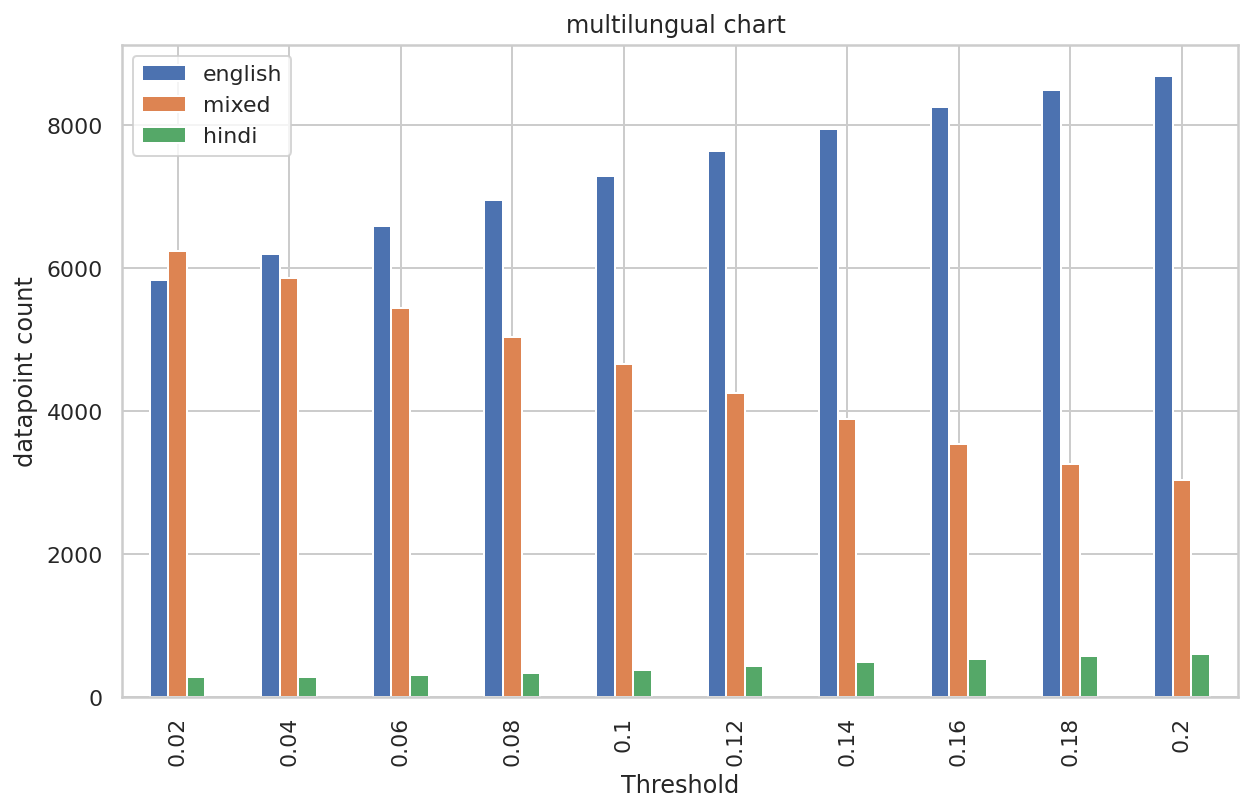

In [48]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]

%config InlineBackend.figure_format = 'retina'
resultData.reset_index().plot(
    x="threshold", y=['english' ,  'mixed' , 'hindi'], kind="bar"
)
plt.title("multilungual chart ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")

Text(0, 0.5, 'datapoint count')

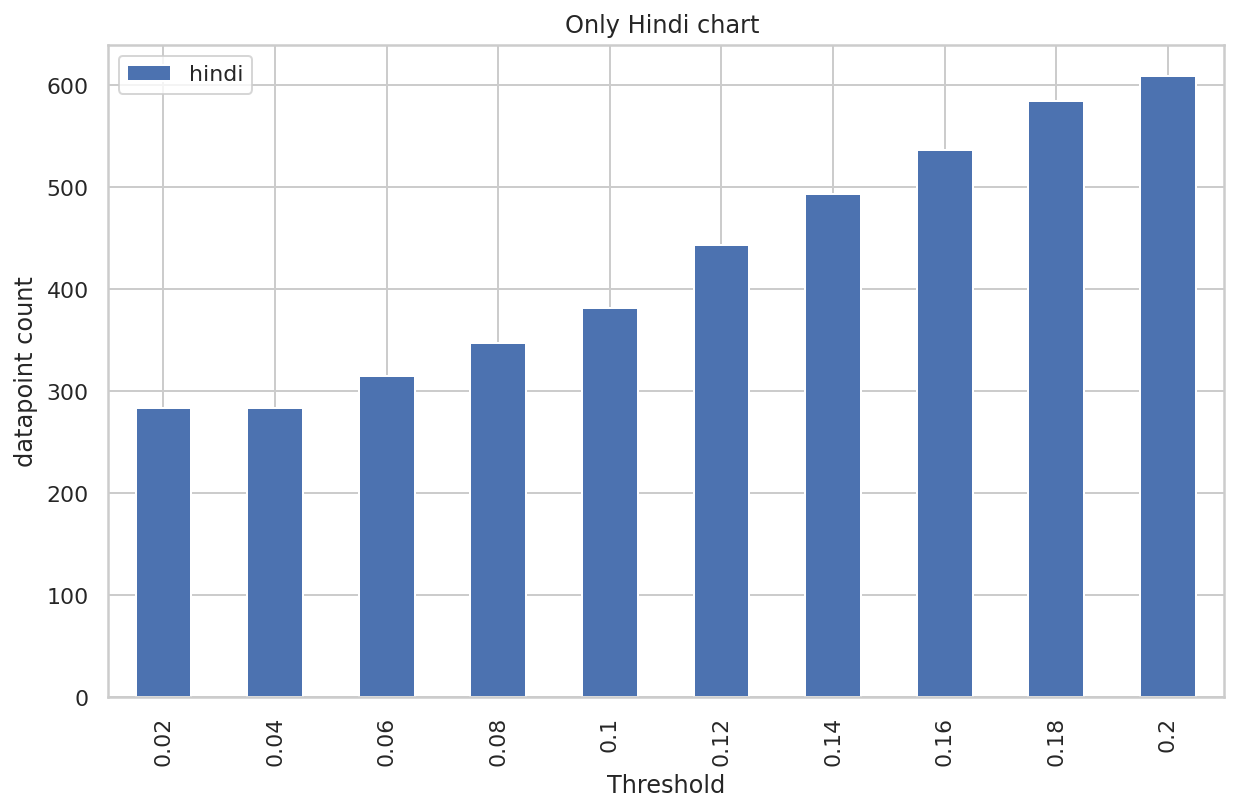

In [51]:
resultData.reset_index().plot(
    x="threshold", y=['hindi'], kind="bar"
)
plt.title("Only Hindi chart ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")

Text(0, 0.5, 'datapoint count')

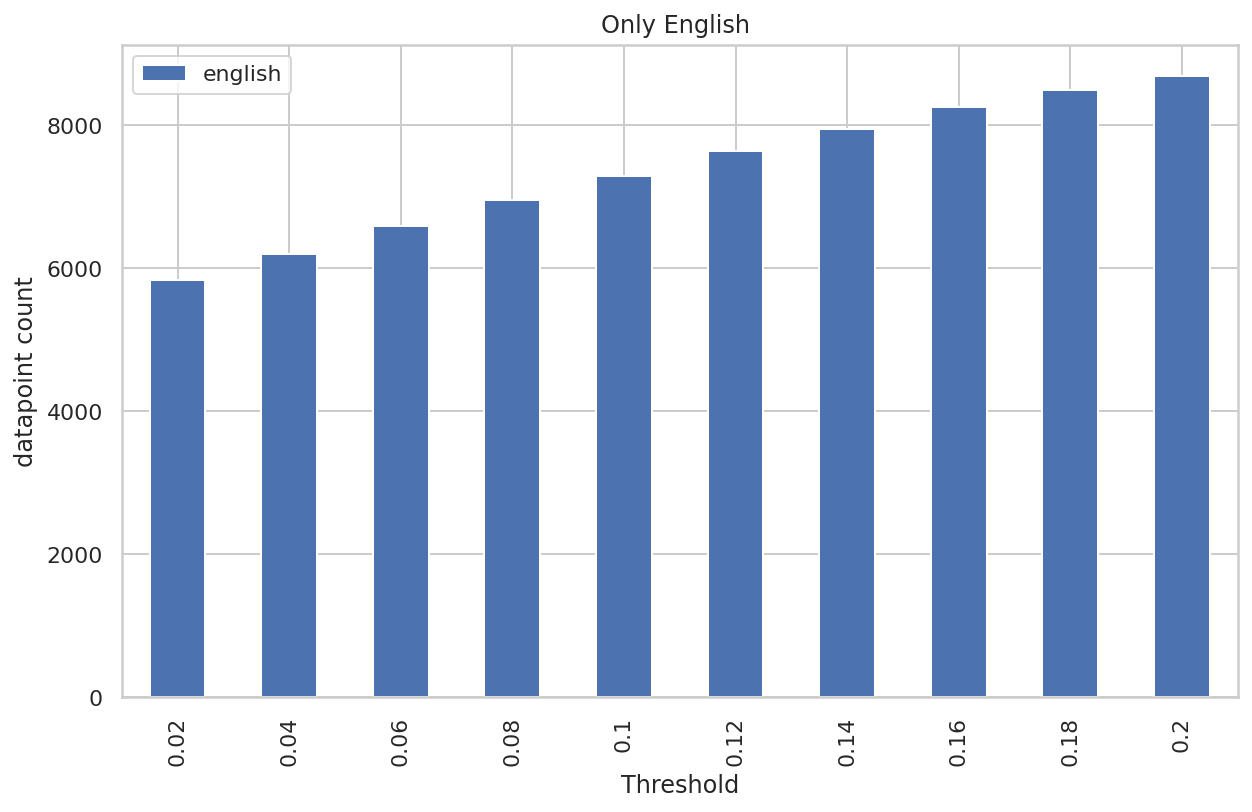

In [37]:
resultData.reset_index().plot(
    x="threshold", y=['english'], kind="bar"
)
plt.title("Only English ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")

Text(0, 0.5, 'datapoint count')

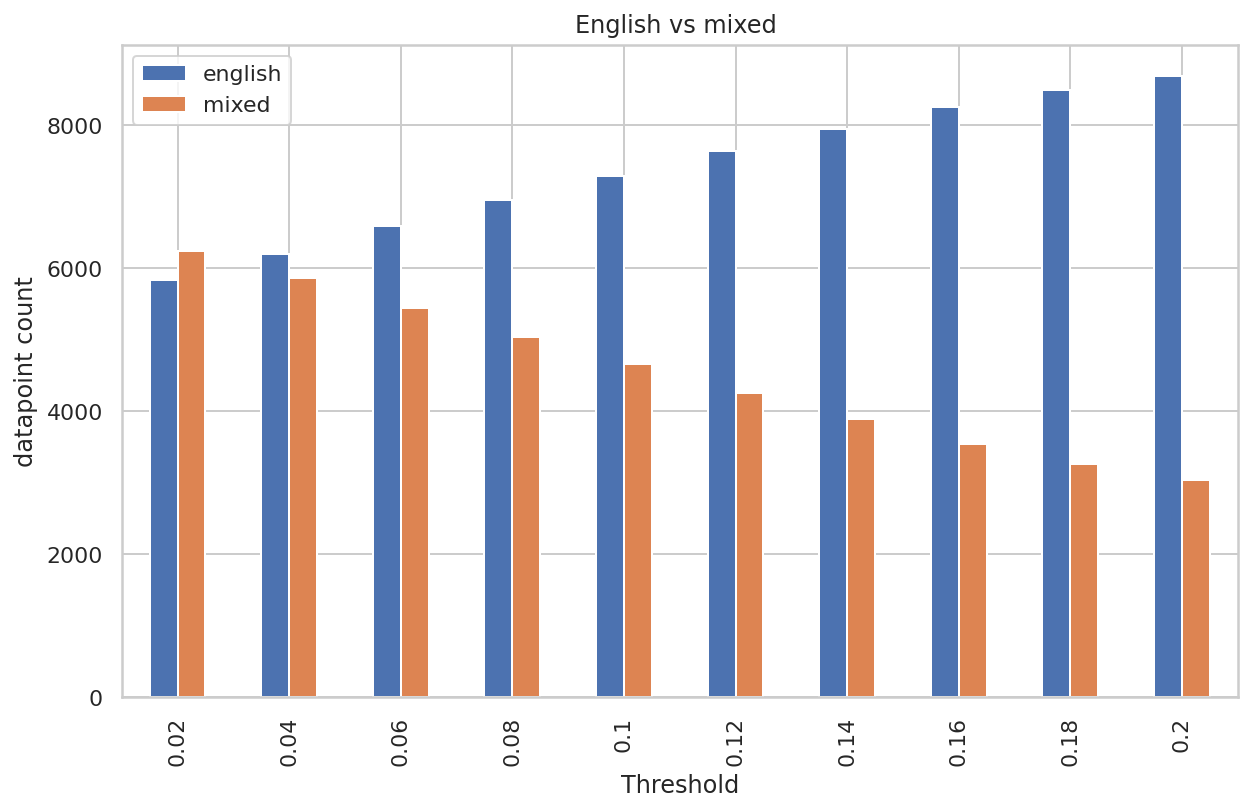

In [38]:
resultData.reset_index().plot(
    x="threshold", y=['english' ,'mixed'], kind="bar"
)
plt.title("English vs mixed ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")

Text(0, 0.5, 'datapoint count')

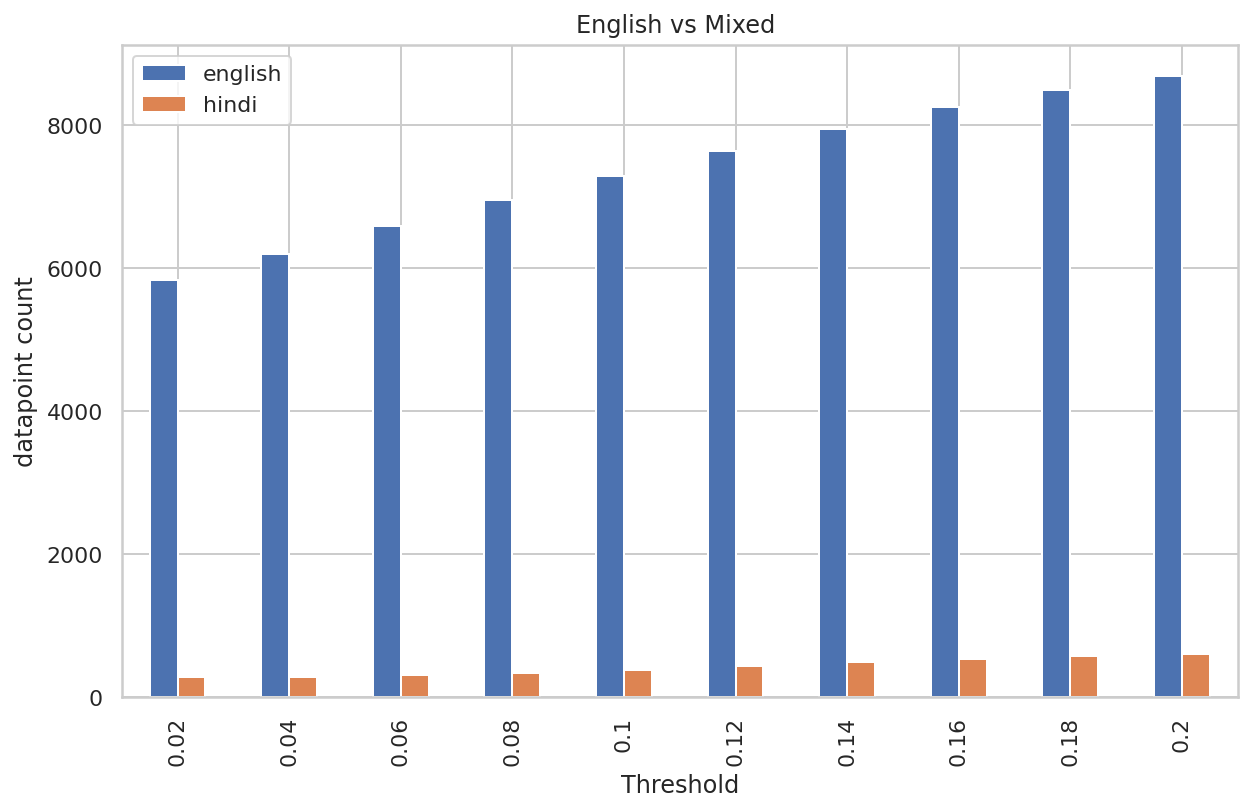

In [42]:
resultData.reset_index().plot(
    x="threshold", y=['english' ,'hindi'], kind="bar"
)
plt.title("English vs Mixed ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")

Text(0, 0.5, 'datapoint count')

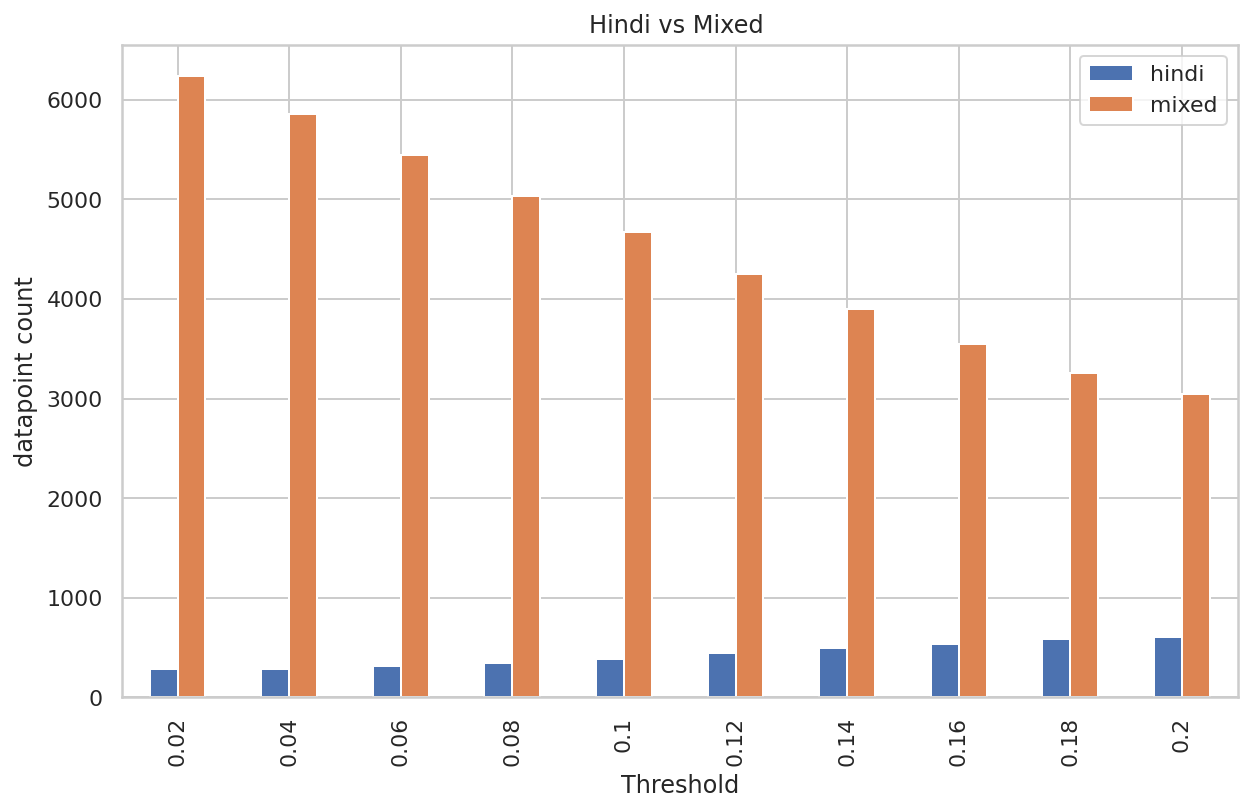

In [41]:
resultData.reset_index().plot(
    x="threshold", y=['hindi' ,'mixed'], kind="bar"
)
plt.title("Hindi vs Mixed ")
plt.xlabel("Threshold")
plt.ylabel("datapoint count")